# Paju

In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import combineArray, multiArraySort, data_loader_from_csv, data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

# Spring: Distance - Pathloss

In [64]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_sp_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_sp_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_sp_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_paju_sp_400.csv>...Total 90557
- moving type: total: 46200 (training: 36960/validation: 9240)
- stationary type: total: 44357 (training: 35485/validation: 8872)
Preprocessing <data/PLdata_paju_sp_1399.csv>...Total 90501
- moving type: total: 46144 (training: 36915/validation: 9229)
- stationary type: total: 44357 (training: 35485/validation: 8872)
Preprocessing <data/PLdata_paju_sp_2249.csv>...Total 90428
- moving type: total: 46071 (training: 36856/validation: 9215)
- stationary type: total: 44357 (training: 35485/validation: 8872)


[Paju-spring]Relu - Moving | distance(log(m))/pathloss(mhz)


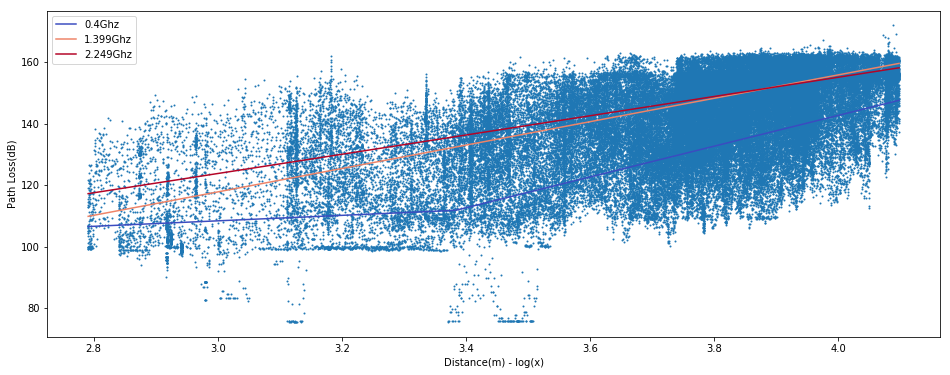

RMSE(dB),train error,val error
0.4Ghz,10.67313,10.67653
1.399Ghz,9.25321,9.34265
2.249Ghz,7.69056,7.57241


In [3]:
%autoreload
print("[Paju-spring]Relu - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)


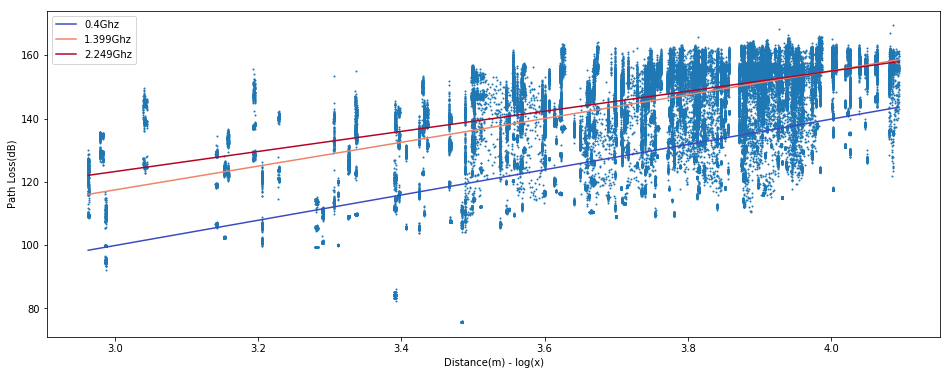

RMSE(dB),train error,val error
0.4Ghz,11.69502,11.55581
1.399Ghz,9.42896,9.40321
2.249Ghz,7.73934,7.78546


In [4]:
%autoreload
print("[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)


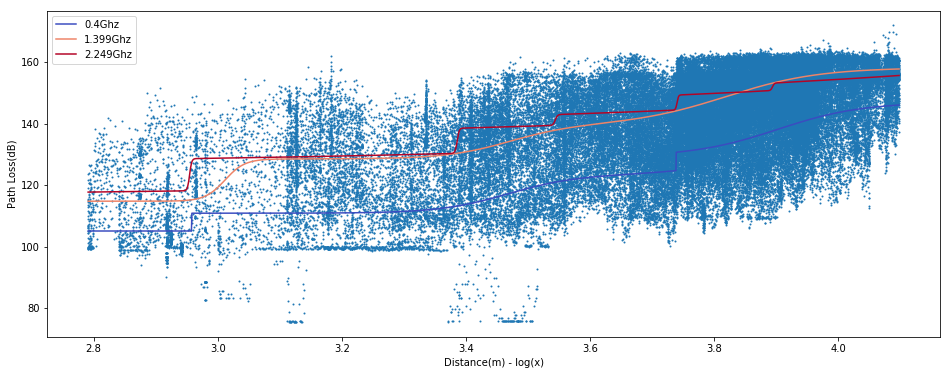

RMSE(dB),train error,val error
0.4Ghz,10.57340,10.64484
1.399Ghz,9.09450,9.14040
2.249Ghz,7.50871,7.60521


In [60]:
%autoreload
print("[Paju-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)


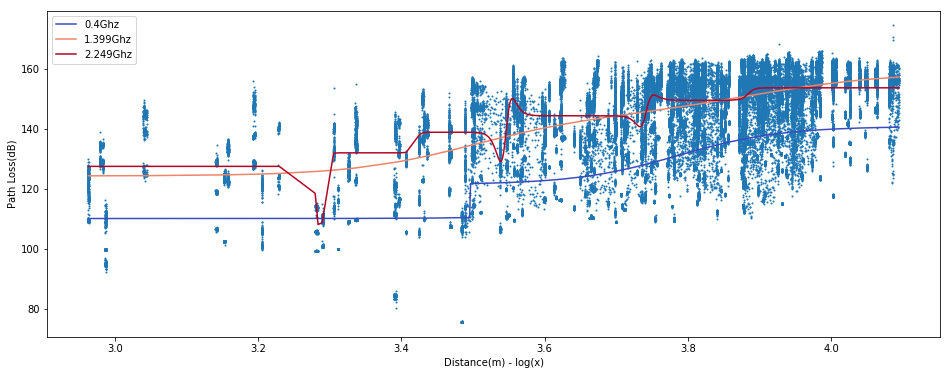

RMSE(dB),train error,val error
0.4Ghz,11.29385,11.12185
1.399Ghz,9.37418,9.25361
2.249Ghz,7.24027,7.30841


In [61]:
%autoreload
print("[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
print("[Paju-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)


[Paju-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)


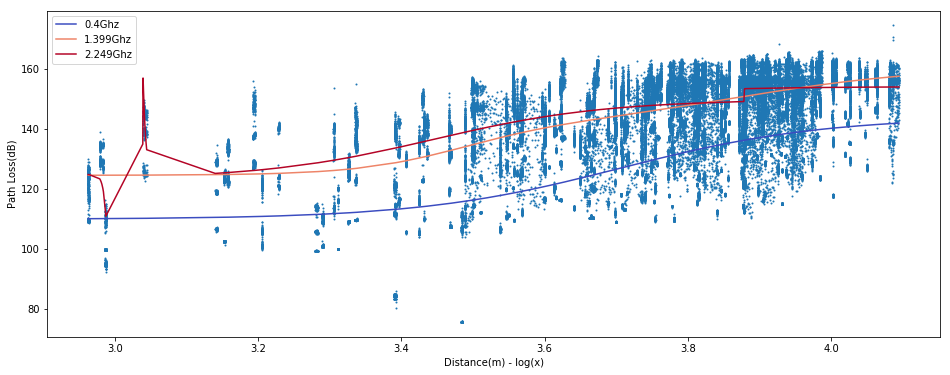

RMSE(dB),train error,val error
0.4Ghz,11.45078,11.27355
1.399Ghz,9.37374,9.25265
2.249Ghz,7.48410,7.53003


In [62]:
%autoreload
print("[Paju-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Spring: Antenna - Pathloss

In [36]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sp_400.csv', 400, 'height')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sp_1399.csv', 1399,'height')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sp_2249.csv', 2249,'height')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_iksan_sp_400.csv>...Total 106636
- moving type: total: 70018 (training: 56014/validation: 14004)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_1399.csv>...Total 106570
- moving type: total: 69952 (training: 55961/validation: 13991)
- stationary type: total: 36618 (training: 29294/validation: 7324)
Preprocessing <data/PLdata_iksan_sp_2249.csv>...Total 106493
- moving type: total: 69875 (training: 55900/validation: 13975)
- stationary type: total: 36618 (training: 29294/validation: 7324)


[Paju-spring]Sigmoid - Moving | height(m)/pathloss(mhz)


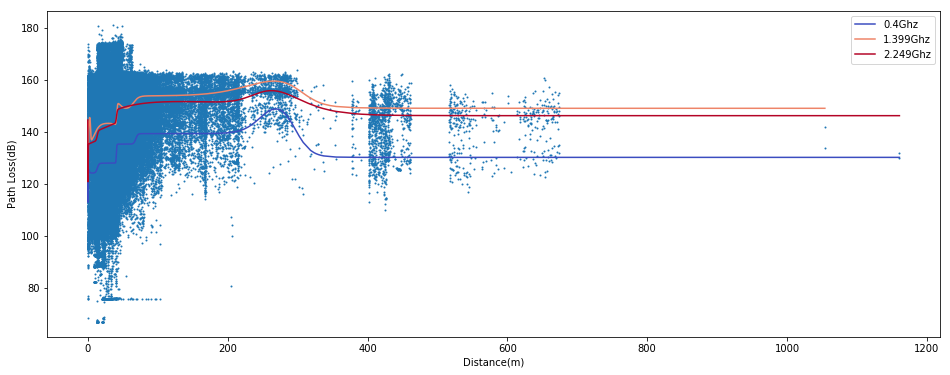

RMSE(dB),train error,val error
0.4Ghz,13.99734,14.27316
1.399Ghz,14.54812,14.51468
2.249Ghz,12.86470,12.98994


In [37]:
%autoreload
print("[Paju-spring]Sigmoid - Moving | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,2].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,2].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,2].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,2].reshape(-1,1), y_train_m, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,2].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,2].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,2].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Sigmoid - Stationary | height(m)/pathloss(mhz)


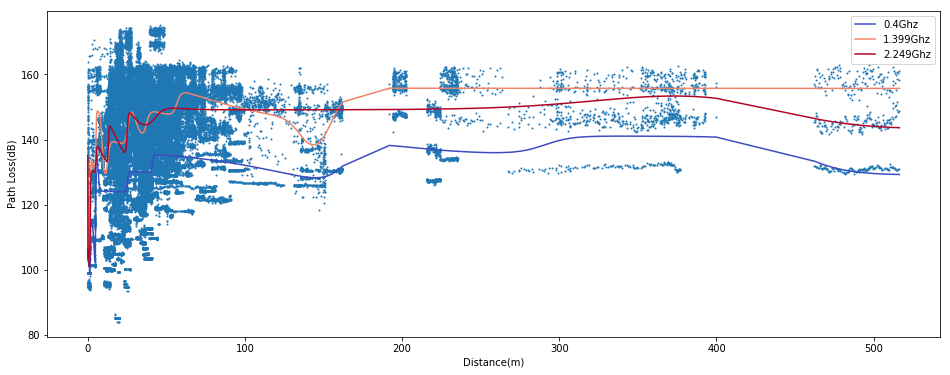

RMSE(dB),train error,val error
0.4Ghz,12.86688,12.80155
1.399Ghz,12.70207,12.78884
2.249Ghz,10.68472,10.95516


In [38]:
%autoreload
print("[Paju-spring]Sigmoid - Stationary | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,2].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,2].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,2].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,2].reshape(-1,1), y_train_s, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,2].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,2].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,2].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Summer: Distance - Pathloss

In [39]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_sm_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_sm_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_sm_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_paju_sm_400.csv>...Total 109969
- moving type: total: 84915 (training: 67932/validation: 16983)
- stationary type: total: 25054 (training: 20043/validation: 5011)
Preprocessing <data/PLdata_paju_sm_1399.csv>...Total 109891
- moving type: total: 84837 (training: 67869/validation: 16968)
- stationary type: total: 25054 (training: 20043/validation: 5011)
Preprocessing <data/PLdata_paju_sm_2249.csv>...Total 109754
- moving type: total: 84700 (training: 67760/validation: 16940)
- stationary type: total: 25054 (training: 20043/validation: 5011)


[Paju-spring]Relu - Moving | distance(log(m))/pathloss(mhz)


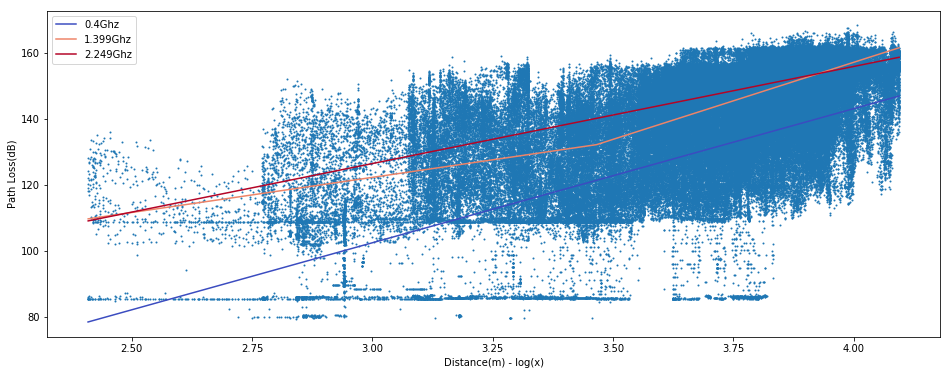

RMSE(dB),train error,val error
0.4Ghz,12.24854,12.34213
1.399Ghz,9.83824,9.75697
2.249Ghz,7.75538,7.81476


In [40]:
%autoreload
print("[Paju-spring]Relu - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)


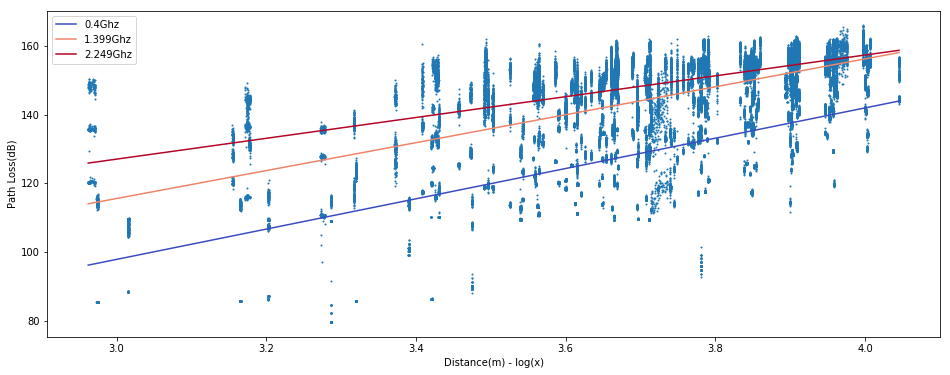

RMSE(dB),train error,val error
0.4Ghz,11.47976,11.39743
1.399Ghz,10.33762,10.04762
2.249Ghz,7.00378,6.94770


In [41]:
%autoreload
print("[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)


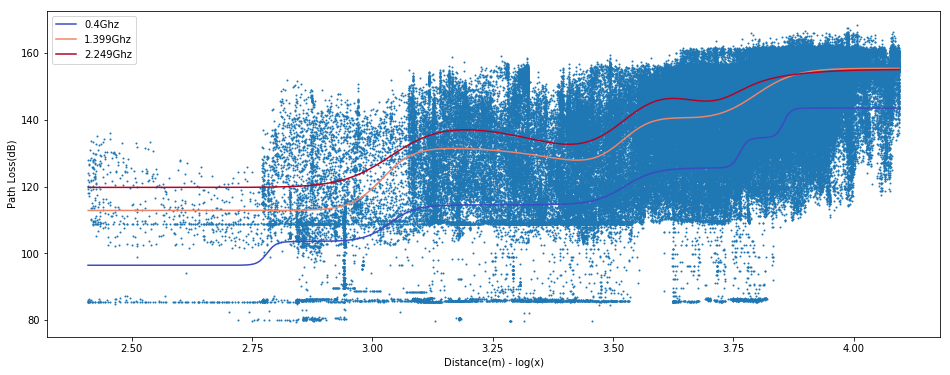

RMSE(dB),train error,val error
0.4Ghz,11.69983,11.80346
1.399Ghz,9.54134,9.44231
2.249Ghz,7.39406,7.41595


In [42]:
%autoreload
print("[Paju-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)


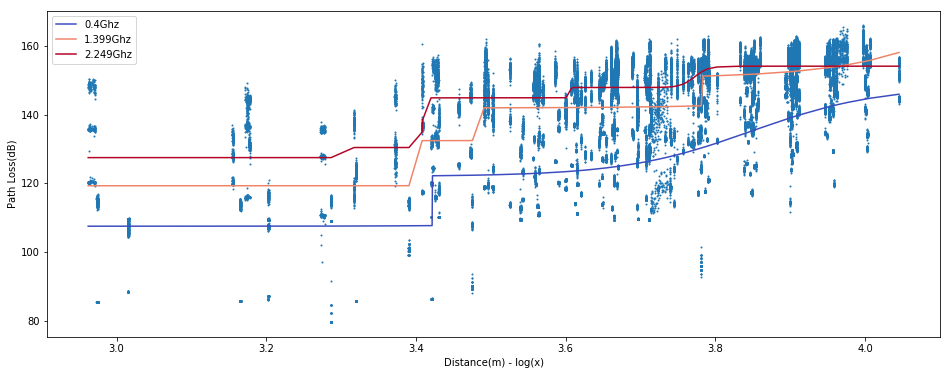

RMSE(dB),train error,val error
0.4Ghz,11.15496,11.07274
1.399Ghz,9.71263,9.48775
2.249Ghz,6.62383,6.60459


In [43]:
%autoreload
print("[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)


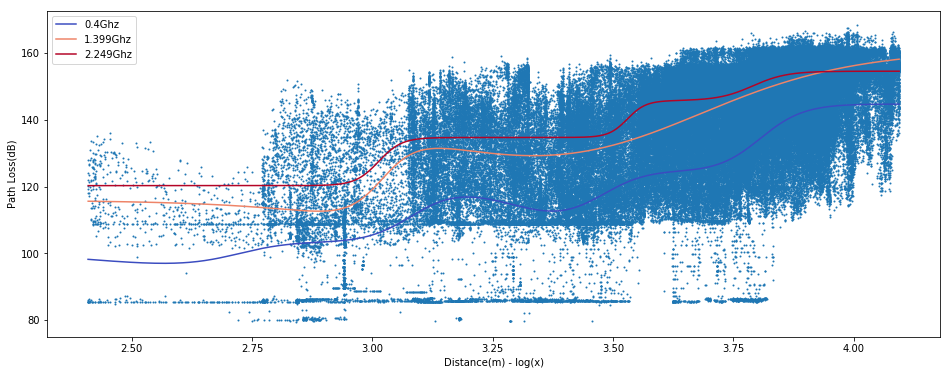

RMSE(dB),train error,val error
0.4Ghz,11.69789,11.80880
1.399Ghz,9.65349,9.56814
2.249Ghz,7.43209,7.45844


In [44]:
%autoreload
print("[Paju-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)


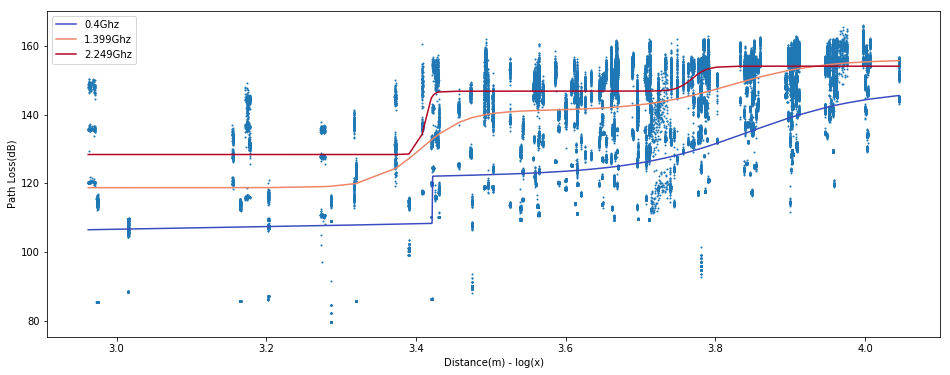

RMSE(dB),train error,val error
0.4Ghz,11.15654,11.07604
1.399Ghz,10.02116,9.83274
2.249Ghz,6.69352,6.69742


In [45]:
%autoreload
print("[Paju-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Summer: Antenna - Pathloss

In [46]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_sm_400.csv', 400, 'height')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_sm_1399.csv', 1399,'height')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_sm_2249.csv', 2249,'height')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_paju_sm_400.csv>...Total 109969
- moving type: total: 84915 (training: 67932/validation: 16983)
- stationary type: total: 25054 (training: 20043/validation: 5011)
Preprocessing <data/PLdata_paju_sm_1399.csv>...Total 109891
- moving type: total: 84837 (training: 67869/validation: 16968)
- stationary type: total: 25054 (training: 20043/validation: 5011)
Preprocessing <data/PLdata_paju_sm_2249.csv>...Total 109754
- moving type: total: 84700 (training: 67760/validation: 16940)
- stationary type: total: 25054 (training: 20043/validation: 5011)


[Paju-summer]Sigmoid - Moving | height(m)/pathloss(mhz)


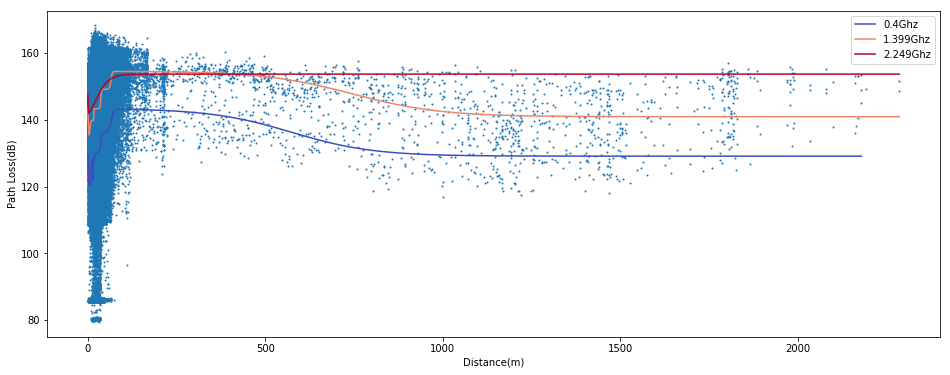

RMSE(dB),train error,val error
0.4Ghz,16.03454,15.97559
1.399Ghz,13.80462,13.77972
2.249Ghz,10.84076,10.95317


In [47]:
%autoreload
print("[Paju-summer]Sigmoid - Moving | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,2].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,2].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,2].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,2].reshape(-1,1), y_train_m, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,2].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,2].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,2].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-summer]Sigmoid - Stationary | height(m)/pathloss(mhz)


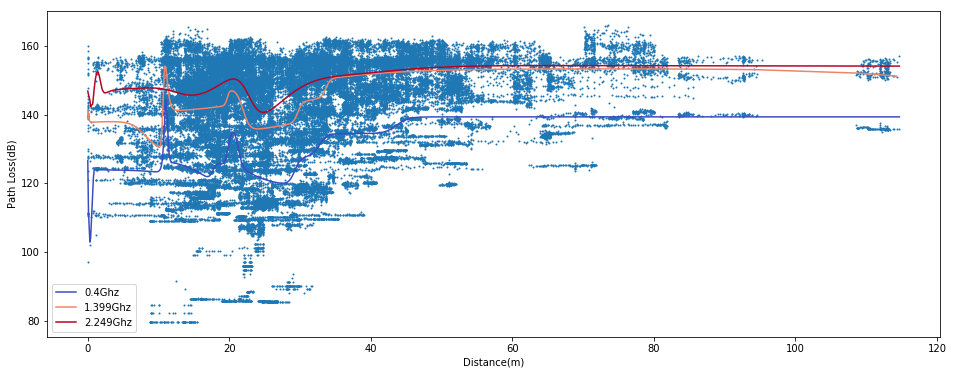

RMSE(dB),train error,val error
0.4Ghz,13.34530,13.10862
1.399Ghz,11.95835,11.70860
2.249Ghz,8.75852,8.77252


In [48]:
%autoreload
print("[Paju-summer]Sigmoid - Stationary | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,2].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,2].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,2].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,2].reshape(-1,1), y_train_s, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,2].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,2].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,2].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Winter: Distance-Pathloss

In [49]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_wt_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_wt_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_wt_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_paju_wt_400.csv>...Total 110440
- moving type: total: 83763 (training: 67010/validation: 16753)
- stationary type: total: 26677 (training: 21341/validation: 5336)
Preprocessing <data/PLdata_paju_wt_1399.csv>...Total 110358
- moving type: total: 83681 (training: 66944/validation: 16737)
- stationary type: total: 26677 (training: 21341/validation: 5336)
Preprocessing <data/PLdata_paju_wt_2249.csv>...Total 110246
- moving type: total: 83569 (training: 66855/validation: 16714)
- stationary type: total: 26677 (training: 21341/validation: 5336)


[Paju-spring]Relu - Moving | distance(log(m))/pathloss(mhz)


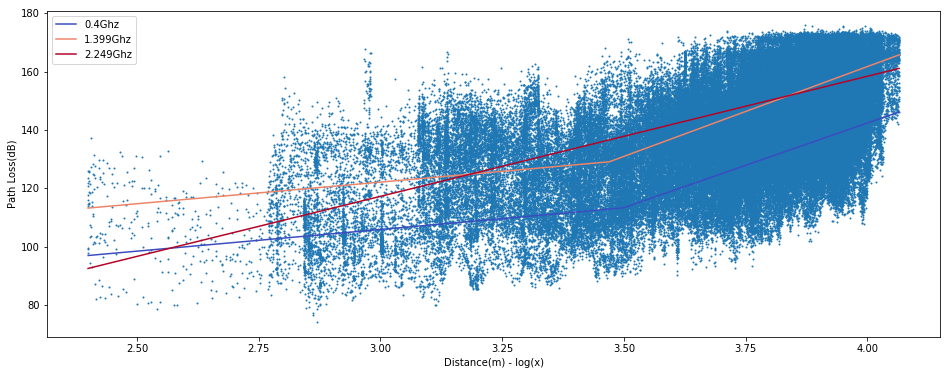

RMSE(dB),train error,val error
0.4Ghz,11.04433,11.04683
1.399Ghz,11.54398,11.65765
2.249Ghz,10.64566,10.70085


In [50]:
%autoreload
print("[Paju-spring]Relu - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)


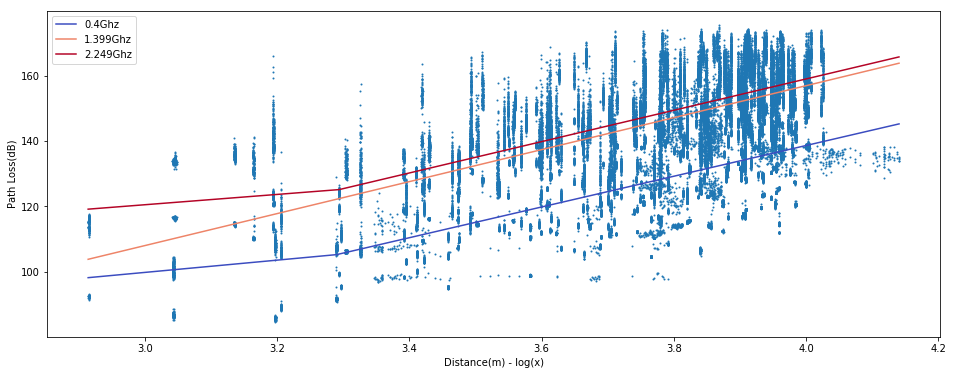

RMSE(dB),train error,val error
0.4Ghz,11.36635,11.45470
1.399Ghz,11.65925,11.73957
2.249Ghz,10.72649,10.72853


In [51]:
%autoreload
print("[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'relu', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'relu', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'relu', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)


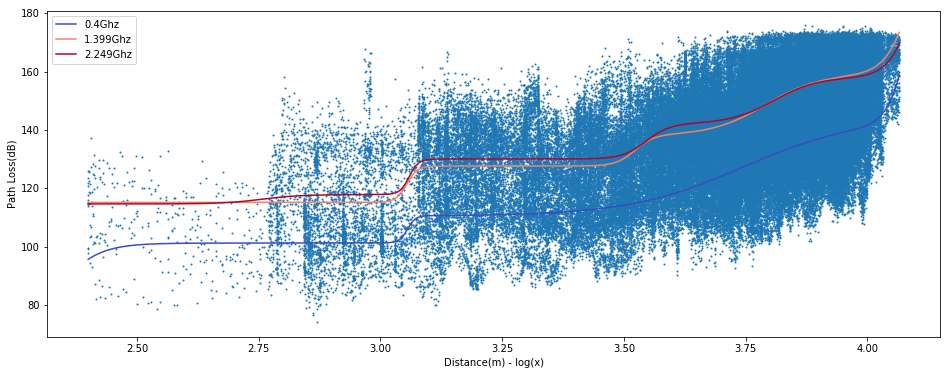

RMSE(dB),train error,val error
0.4Ghz,10.99040,10.97937
1.399Ghz,11.41098,11.52070
2.249Ghz,10.24033,10.27526


In [52]:
%autoreload
print("[Paju-spring]Sigmoid(Logistic) - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)


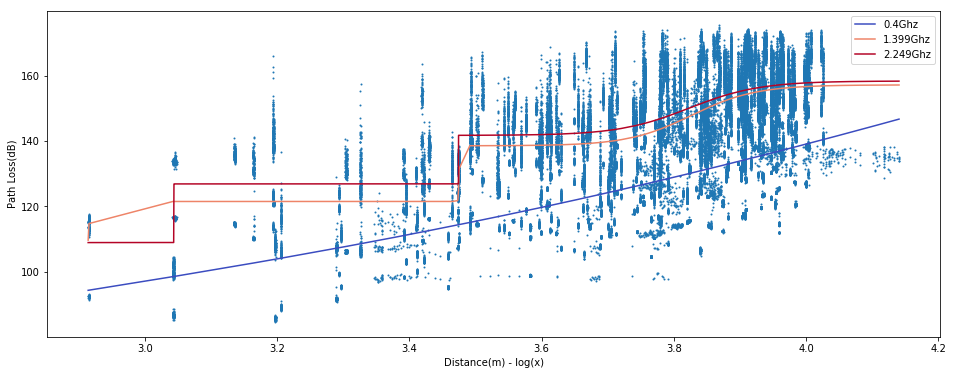

RMSE(dB),train error,val error
0.4Ghz,11.37930,11.46465
1.399Ghz,11.25420,11.39145
2.249Ghz,10.43009,10.45821


In [53]:
%autoreload
print("[Paju-spring]Relu - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)


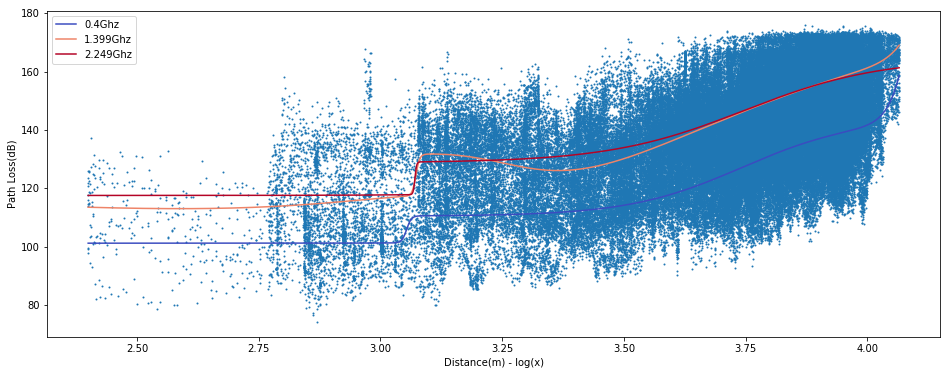

RMSE(dB),train error,val error
0.4Ghz,10.99121,10.98032
1.399Ghz,11.42891,11.54395
2.249Ghz,10.32113,10.35146


In [54]:
%autoreload
print("[Paju-spring]Tanh - Moving | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,0].reshape(-1,1), y_train_m, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,0].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,0].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,0].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)


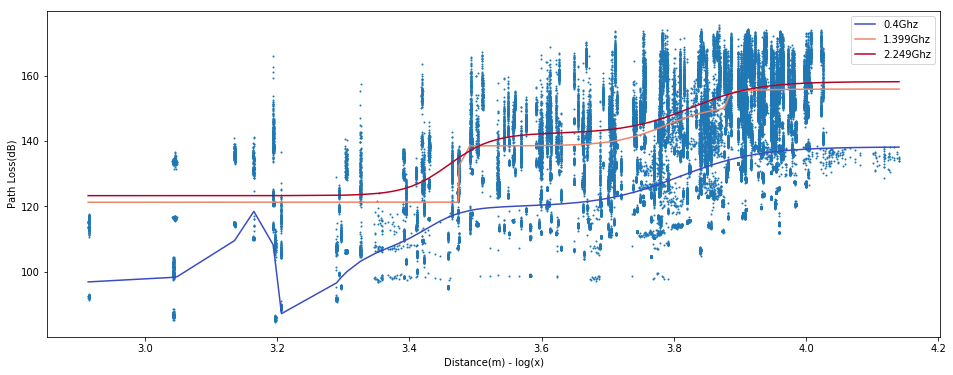

RMSE(dB),train error,val error
0.4Ghz,11.12291,11.22592
1.399Ghz,11.25068,11.39868
2.249Ghz,10.60566,10.60273


In [55]:
%autoreload
print("[Paju-spring]Tanh - Stationary | distance(log(m))/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,0].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,0].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,0].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'tanh', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'tanh', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'tanh', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,0].reshape(-1,1), y_train_s, 'distance')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,0].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,0].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,0].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Winter: Antenna - Pathloss

In [56]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_wt_400.csv', 400, 'height')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_wt_1399.csv', 1399,'height')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_wt_2249.csv', 2249,'height')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_paju_wt_400.csv>...Total 110440
- moving type: total: 83763 (training: 67010/validation: 16753)
- stationary type: total: 26677 (training: 21341/validation: 5336)
Preprocessing <data/PLdata_paju_wt_1399.csv>...Total 110358
- moving type: total: 83681 (training: 66944/validation: 16737)
- stationary type: total: 26677 (training: 21341/validation: 5336)
Preprocessing <data/PLdata_paju_wt_2249.csv>...Total 110246
- moving type: total: 83569 (training: 66855/validation: 16714)
- stationary type: total: 26677 (training: 21341/validation: 5336)


[Paju-winter]Sigmoid - Moving | height(m)/pathloss(mhz)


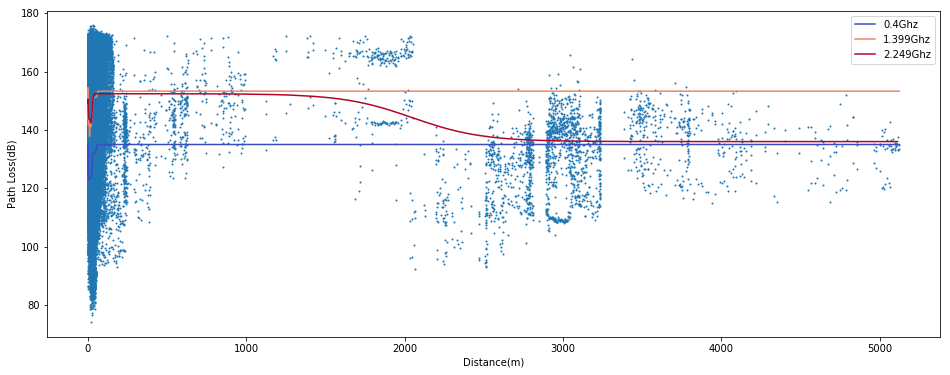

RMSE(dB),train error,val error
0.4Ghz,14.81626,14.72653
1.399Ghz,15.84158,15.84387
2.249Ghz,14.22812,14.22700


In [57]:
%autoreload
print("[Paju-winter]Sigmoid - Moving | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_m_400[:,2].reshape(-1,1)
y_400 = np.array(y_train_m_400).reshape(len(y_train_m_400))
x_1399 = X_train_m_1399[:,2].reshape(-1,1)
y_1399 = np.array(y_train_m_1399).reshape(len(y_train_m_1399))
x_2249 = X_train_m_2249[:,2].reshape(-1,1)
y_2249 = np.array(y_train_m_2249).reshape(len(y_train_m_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_m[:,2].reshape(-1,1), y_train_m, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_m_400[:,2].reshape(-1,1), np.array(y_val_m_400).reshape(len(y_val_m_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_m_1399[:,2].reshape(-1,1), np.array(y_val_m_1399).reshape(len(y_val_m_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_m_2249[:,2].reshape(-1,1), np.array(y_val_m_2249).reshape(len(y_val_m_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

[Paju-winter]Sigmoid - Stationary | height(m)/pathloss(mhz)


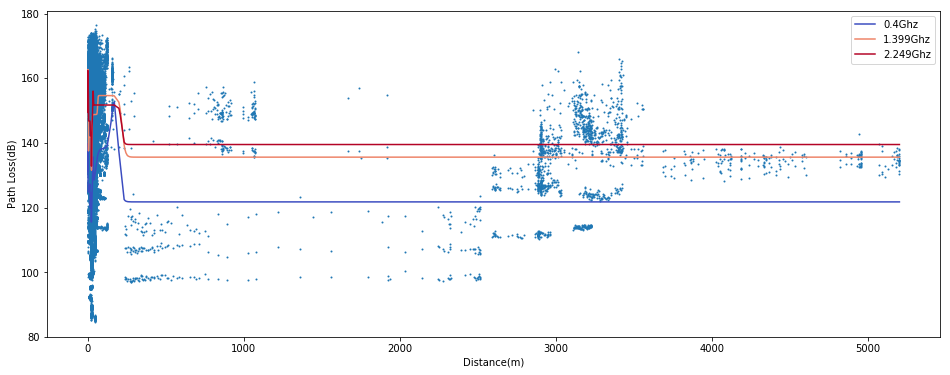

RMSE(dB),train error,val error
0.4Ghz,13.52233,13.38115
1.399Ghz,14.44916,14.48189
2.249Ghz,13.22452,13.31524


In [58]:
%autoreload
print("[Paju-winter]Sigmoid - Stationary | height(m)/pathloss(mhz)")
dataX = list()
dataY = list()
dataPredX = list()
x_400 = X_train_s_400[:,2].reshape(-1,1)
y_400 = np.array(y_train_s_400).reshape(len(y_train_s_400))
x_1399 = X_train_s_1399[:,2].reshape(-1,1)
y_1399 = np.array(y_train_s_1399).reshape(len(y_train_s_1399))
x_2249 = X_train_s_2249[:,2].reshape(-1,1)
y_2249 = np.array(y_train_s_2249).reshape(len(y_train_s_2249))

dataX.append(x_400)
dataY.append(y_400)
model_400 = mlp_regression(x_400, y_400, (60), 'logistic', 'lbfgs')
dataPredX.append(model_400.predict(x_400))
model_1399 = mlp_regression(x_1399, y_1399, (60), 'logistic', 'lbfgs')
dataX.append(x_1399)
dataY.append(y_1399)
dataPredX.append(model_1399.predict(x_1399))
model_2249 = mlp_regression(x_2249, y_2249, (60), 'logistic', 'lbfgs')
dataX.append(x_2249)
dataY.append(y_2249)
dataPredX.append(model_2249.predict(x_2249))

mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_s[:,2].reshape(-1,1), y_train_s, 'height')

stat = np.array([mlp_prediction_error(model_400,x_400, y_400), mlp_prediction_error(model_400,X_val_s_400[:,2].reshape(-1,1), np.array(y_val_s_400).reshape(len(y_val_s_400))),
                 mlp_prediction_error(model_1399,x_1399, y_1399),mlp_prediction_error(model_1399,X_val_s_1399[:,2].reshape(-1,1), np.array(y_val_s_1399).reshape(len(y_val_s_1399))),
                 mlp_prediction_error(model_2249,x_2249, y_2249),mlp_prediction_error(model_2249,X_val_s_2249[:,2].reshape(-1,1), np.array(y_val_s_2249).reshape(len(y_val_s_2249)))])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))